Music Genre Classification for Reduced Features performed by PCA on 10 genre dataset and 5 genre dataset

In [232]:
# importing required python packages
from itertools import cycle
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,f1_score,precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

Reading the Dataset

In [240]:
# Reading extracted feature dataset into dataframe
dataset = pd.read_csv('data_set.csv')

Generating Training and Test Dataset

In [241]:
# Generating test and train dataset by using train_test_split
no_of_cols = dataset.shape[1] - 1
X = dataset.iloc[:, :no_of_cols]
y = dataset.iloc[:, no_of_cols]
genres = list(y.unique())
genre_label = {genre: genres.index(genre) for genre in genres}
y = y.map(genre_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(genre_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


Finding out variance associated with each feature using PCA

In [10]:
# To check which feature has larger variance
pca = PCA(n_components= None)
# X_train = 
pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.25773518e-01, 2.00257447e-01, 1.44518116e-01, 5.70794132e-02,
       3.69746883e-02, 2.69387843e-02, 2.31850705e-02, 1.68174321e-02,
       1.43722082e-02, 1.26999162e-02, 1.12344614e-02, 1.09804630e-02,
       1.04045043e-02, 9.78642253e-03, 8.87210351e-03, 8.63279604e-03,
       8.20290756e-03, 7.45232980e-03, 7.26721233e-03, 6.92005500e-03,
       6.84832985e-03, 6.16681734e-03, 5.91710524e-03, 5.50284856e-03,
       4.84345787e-03, 4.13407404e-03, 3.55855970e-03, 3.41465254e-03,
       2.85837295e-03, 2.84044321e-03, 1.99982002e-03, 1.48336743e-03,
       1.00174233e-03, 6.31874412e-04, 2.92924130e-04, 1.35761560e-04])

Doing PCA by changing n_components values

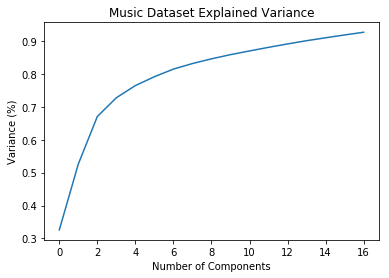

In [242]:
pca = PCA(n_components= 17)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Music Dataset Explained Variance')
plt.show()

Function to generate and plot Confusion Matrix and to plot ROC Curve

In [229]:
# function to plot confusion matrix
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# function to generate confusion matrix
def plot_cnf(true_y,y_pred,GENRES):
    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,y_pred)
    plt.figure()
    confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

# function to generate ROC curve
def plot_roc(y_test, pred_proba,c):
    y_test = label_binarize(y_test, classes=c)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(c)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'orange', 'red', 'purple', 'brown', 'olive', 'gray'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.0,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Music Genre')
    plt.legend(loc="lower right")
    plt.show()

Grid Search on MLP

In [ ]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive'],
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=5,
                           scoring='accuracy')
clf.fit(X,y)
print("Best parameters set found on development set:")
print(clf.best_params_)

Grid Search on SVC

In [ ]:
param_grid = [
        {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),
         'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
       ]

clf = GridSearchCV(SVC(), param_grid, cv=5,
                           scoring='accuracy')
clf.fit(X,y)
print("Best parameters set found for SVC:")
print(clf.best_params_)

Grid Search on RFC

In [ ]:
param_grid = [
        {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
            'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
       ]

clf = GridSearchCV(RFC(), param_grid, cv=5, scoring='accuracy')
clf.fit(X,y)
print("Best parameters set found for RFC:")
print(clf.best_params_)

Classifier function that prints confusion matrix, accuracy and ROC Curve

In [243]:
def classifier(type):
    if type == "mlp":
        clf = MLPClassifier(activation = 'identity', hidden_layer_sizes = (15,), solver = 'lbfgs', learning_rate = 'constant', alpha = 0.05)
    elif type == "svc":
        clf = SVC(C = 1, decision_function_shape = "ovo", gamma = 1, kernel = "poly", shrinking = True, probability = True)
    elif type == "rfc":
        clf = RFC(criterion="entropy",max_depth=8,max_features ="auto",n_estimators=500)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Cross-validated scores for " + type + " : ", scores)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print("Accuracy: ", accuracy)
    plot_cnf(y_test, predictions, genres)
    plot_roc(y_test, pred_proba, list(genre_label.values()))
    

MLP Classifier for reduced feature on all genre dataset

Cross-validated scores for mlp :  [0.58918919 0.57923497 0.63483146 0.59550562 0.59090909]
Accuracy:  0.69


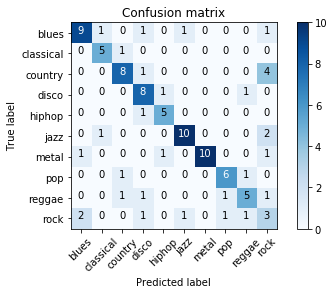

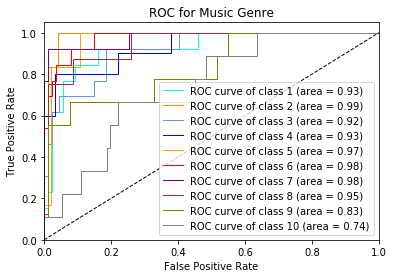

In [224]:
classifier("mlp")

SVC Classifier for reduced feature on all genre dataset

Cross-validated scores for svc :  [0.55675676 0.6010929  0.57303371 0.51123596 0.59090909]
Accuracy:  0.63


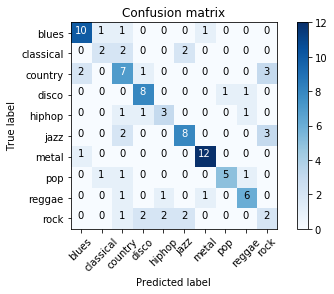

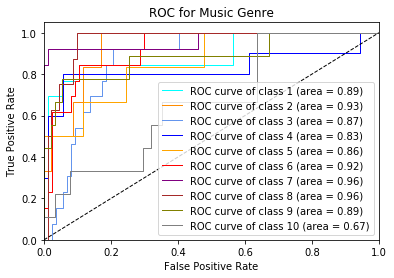

In [231]:
classifier("svc")

RFC Classifier for reduced feature on all genre dataset

Cross-validated scores for rfc :  [0.51891892 0.47540984 0.58988764 0.52808989 0.625     ]
Accuracy:  0.64


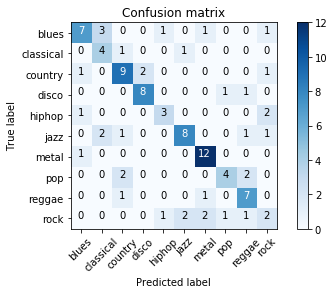

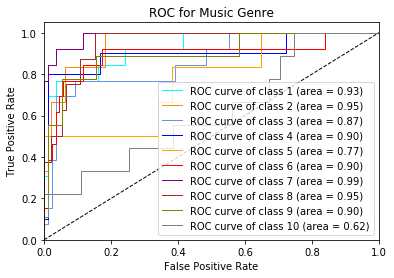

In [244]:
classifier("rfc")

Loading dataset for only 5 genre

In [276]:
dataset = dataset[dataset['genre'].isin (['metal','classical','hiphop','pop','jazz'])]

Obtaining Train and Test Dataset

In [277]:
no_of_cols = dataset.shape[1] - 1
X = dataset.iloc[:, :no_of_cols]
y = dataset.iloc[:, no_of_cols]
genres = list(y.unique())
genre_label = {genre: genres.index(genre) for genre in genres}
y = y.map(genre_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Performing PCA on 5 genre dataset

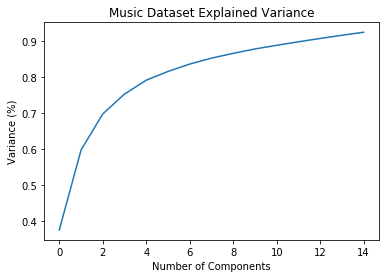

In [278]:
pca = PCA(n_components= 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Music Dataset Explained Variance')
plt.show()

MLP Classifier for reduced feature on 5 genre dataset

Cross-validated scores for mlp :  [0.70652174 0.77173913 0.76666667 0.73863636 0.80681818]
Accuracy:  0.9


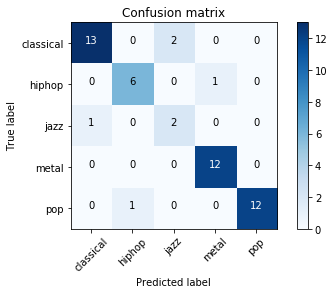

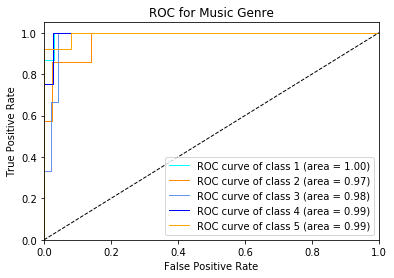

In [265]:
classifier("mlp")

SVC Classifier for reduced feature on 5 genre dataset

Cross-validated scores for svc :  [0.73913043 0.80434783 0.77777778 0.73863636 0.84090909]
Accuracy:  0.92


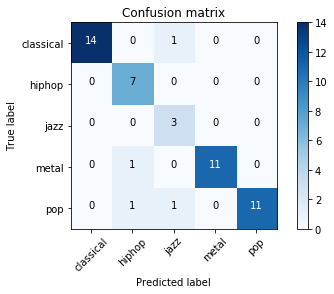

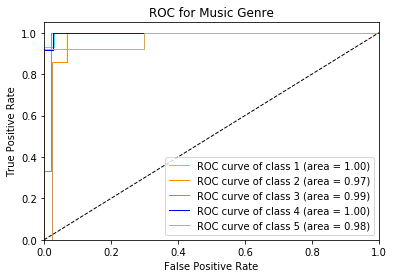

In [268]:
classifier("svc")

RFC Classifier for reduced feature on 5 genre dataset

Cross-validated scores for rfc :  [0.82608696 0.79347826 0.84444444 0.78409091 0.88636364]
Accuracy:  0.92


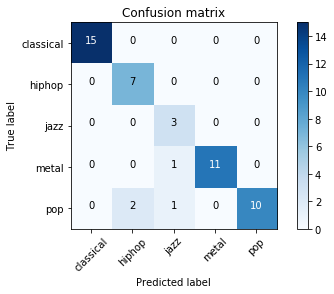

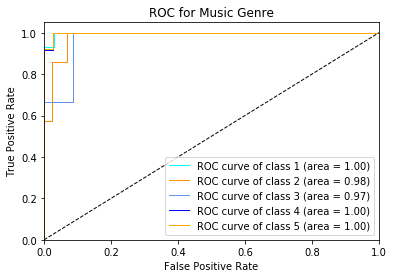

In [279]:
classifier("rfc")